# Kernel Regression

Given a training dataset $\{x_i, y_i\}_{i=1}^n$, kernel regression approximates the unknown 
nolinear relation between $x$ and $y$ with a function of form
$$
y\approx f(x;w) = \sum_{i=1}^n w_i k(x, x_i),
$$
where $k(x, x')$ is a positive definite kernel specified by the users, and ${w_i}$ is a
set of weights. 
We will use the simple Gaussian radius basis funciton (RBF) kernel,
$$
k(x, x') = exp(-\frac{||x-x'||^2}{2h^2}),
$$
where $h$ is a bandwith parameter. 

### Step 1. Simulate 1-dimensional dataset


xTrain shape (100, 1) yTrain shape (100, 1)


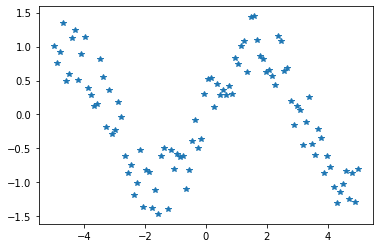

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(100)

### Step 1: Simulate a simple 1D data ###
xTrain = np.expand_dims(np.linspace(-5, 5, 100), 1)  # 100*1
yTrain = np.sin(xTrain) + 0.5*np.random.uniform(-1, 1, size=xTrain.shape) ## 100 *1

print('xTrain shape', xTrain.shape, 'yTrain shape', yTrain.shape)
plt.plot(xTrain, yTrain, '*')
plt.show()

Now we have a dataset with 100 training data points. Let us calculate the kernel function. 

### Step 2. Kernel function

Your task is to complete the following rbf_kernel function that takes two sets of points $X$ (of size $n$) and $X'$ (of size $m$) and the bandwidth $h$ and ouputs their pairwise  kernel matrix $K = [k(x_i, x_j)]_{ij}$, which is of size $n\times m$. (We represent input data as matrices, $X=[x_i]_{i=1}^n \in R^{n\times 1}$ denotes the input features and $Y=[y_i]_{i=1}^n\in R^{n\times 1}$ is the input labels.)

In [2]:
"""
    calcuating kernel matrix between X and Xp
"""
def rbf_kernel(X, Xp, h):
    # X: n*1 matrix
    # Xp: m*1 matrix
    # h: scalar value 
    
    from scipy.spatial import distance
    dist = distance.cdist(X, Xp, 'sqeuclidean')
    K = np.exp(- dist/2/h**2)
    
    #    
    ## TODO 
    
    return K #n*m

    
# evaluation: if your implementation is correct, you should expect the output is a 2X3 matrix
# [[0.60653066 1.         0.60653066]
# [0.13533528 0.60653066 1.        ]]

k_test = rbf_kernel(np.array([[2],[1]]), np.array([[3],[2],[1]]), 1)
print(k_test)
    

[[0.60653066 1.         0.60653066]
 [0.13533528 0.60653066 1.        ]]


### Step 3. The median trick for bandwith
The choice of the bandwidth $h$
A common way to set the bandwith $h$ in practice is the so called median trick,
which sets $h$ to be the median of the pairwise distance on the training data, that is
$$
h_{med} = median(\{||x_i - x_j||: i\neq j, ~~~~~~i,j =1, ..., n\}).
$$

- Compelete the median distance function. 


In [3]:
from scipy.spatial import distance

def median_distance(X):
    # X: n*1 matrix
        
    dist = distance.cdist(X, X, 'euclidean')
    h = np.median([dist[i, j] for i in range(len(X)) for j in range(len(X)) if i != j])
    return h
    
    # 
    #h = ...
    #return h

### Test your functions
#evaluation: if your implementation is correct, your answer should be [2.0]
h_test = median_distance(np.array([[1],[2],[4]]))
print(h_test)

2.0


### Step 4. Kernel regression
The weights ${w_i}$ are estimated by minimizing a regularized mean square error:
$$
\min_w {\sum_{i=1}^n (y_i - f(x_i; w))^2 + \beta w^\top K w },     
$$
where $w$ is the column vector formed by $w=[w_i]_{i=1}^n$ and K is the kernel matrix.

- Please derive the optimal solution for $\{w_i\}$ 

- Compelte the following function for calculating the model parameters

In [4]:
def kernel_regression_fitting(xTrain, yTrain, h, beta=1):
    # X: input data, numpy array, n*1
    # Y: input labels, numpy array, n*1
    
    K = rbf_kernel(xTrain, xTrain, h)
    W = np.dot(np.linalg.inv(K + beta*np.eye(len(K))), yTrain)
    #print(np.sum(W))
    
    #W = ... # n*1 matrix
    # TODO

    return W

## evaluating your code, the shape should be (100, 1)
h = median_distance(xTrain)
print(h)
W_test = kernel_regression_fitting(xTrain, yTrain, h)
print(W_test.shape)

3.03030303030303
(100, 1)


### Step 5. Evaluation and Cross Validation

We now need to evaluate the algorithm on the testing data and select the hyperparameters (bandwidth and regularization coefficient) using cross validation

-5.526641656149085


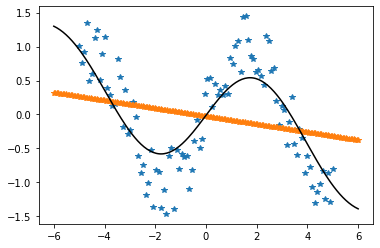

In [5]:
def kernel_regression_fit_and_predict(xTrain, yTrain, xTest, h, beta):
    
    #fitting on the training data 
    W = kernel_regression_fitting(xTrain, yTrain, h, beta)
    
    # computing the kernel matrix between xTrain and xTest
    K_xTrain_xTest = rbf_kernel(xTrain, xTest, h)
   
    # predict the label of xTest
    yPred = np.dot( K_xTrain_xTest.T, W)
    return yPred

# generate random testing data
xTest = np.expand_dims(np.linspace(-6, 6, 200), 1) ## 200*1


beta = 1.
# calculating bandwith
h = median_distance(xTrain)  
yHatk = kernel_regression_fit_and_predict(xTrain, yTrain, xTest, h, beta)

# we also add linear regression for comparision
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(xTrain, yTrain)  
yHat = lr.predict(xTest) # prediction
print(yHat.sum())

# visulization
plt.plot(xTrain, yTrain, '*')
plt.plot(xTest, yHat, '*')
plt.plot(xTest, yHatk, '-k')
plt.show()

### Step 5.1. Impact of bandwith 
Run the kernel regression with regularization coefficient $\beta=1$ and 
bandwidth $h \in \{ 0.1 h_{med}, h_{med}, 10h_{med}\}$.

- Task: Show the curve learned by different $h$. Comment on how $h$ influences the smoothness of $h$.


-3.552713678800501e-15 -2.7633208280745434 0.0
-3.552713678800501e-15 -2.7633208280745434 0.0
-3.552713678800501e-15 -2.7633208280745434 0.0


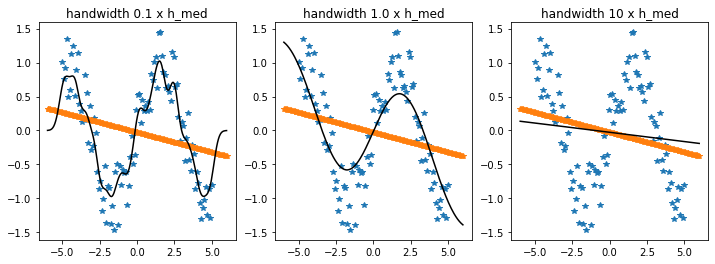

In [6]:
### fitting on the training data ###
beta = 1.

plt.figure(figsize=(12, 4))
for i, coff in enumerate([0.1, 1., 10]):
    plt.subplot(1, 3, i+1)
    # bandwith
    h = coff * median_distance(xTrain)  
    print(xTrain.sum(), yTrain.sum(), xTest.sum())
    yHatk_i = kernel_regression_fit_and_predict(xTrain, yTrain, xTest, h, beta)

    # visulization
    plt.plot(xTrain, yTrain, '*')
    plt.plot(xTest, yHat, '*')
    plt.plot(xTest, yHatk_i, '-k')
    plt.title('handwidth {} x h_med'.format(coff))
    
plt.show()

## Large bandwidth leads to smooth estimation

### Step 5.2. Cross Validation (CV)
Use 5-fold cross validation to find the optimal combination of 
$h$ and $\beta$ within $h\in \{0.1h_{med}, h_{med}, 10h_{med}\}$ and $\beta \in \{0.1, 1\}$.
- Task: complete the code of cross validation and find the best $h$ and $\beta$. Plot the curve fit with the optimal hyperparameters.

Beta beta 1 Best bandwith 0.1*h_med mse 0.11166229355896191


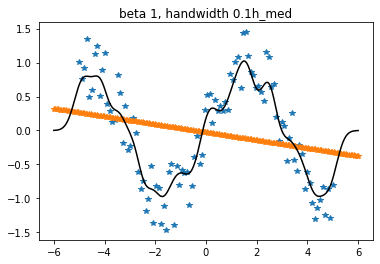

In [7]:
best_beta, best_coff = 1., 1.
best_mse = 1e8
for beta in [0.1, 1]:
    for coff in [0.1, 1., 10.]:
        # 5-fold cross validation
        max_fold = 5
        mse = []
        for i in range(max_fold):
            trnIdx = [idx for idx in range(len(xTrain)) if idx%max_fold!=i]
            testIdx = [idx for idx in range(len(xTrain)) if idx%max_fold==i]
            
            i_xTrain, i_yTrain = xTrain[trnIdx], yTrain[trnIdx]
            i_xValid, i_yValid = xTrain[testIdx], yTrain[testIdx]
            
            h = coff * median_distance(i_xTrain)  
            i_pred = kernel_regression_fit_and_predict(i_xTrain, i_yTrain, i_xValid, h, beta)
            mse.append((i_yValid - i_pred)**2)
        mse = np.mean(mse)
        if mse < best_mse:
            best_beta, best_coff = beta, coff
            best_mse = mse
        
print('Beta beta', best_beta, 'Best bandwith', '{}*h_med'.format(best_coff), 'mse', best_mse)

# bandwith
h = best_coff * median_distance(xTrain)  
yHatk_i = kernel_regression_fit_and_predict(xTrain, yTrain, xTest, h, best_beta)
    
# visulization
plt.plot(xTrain, yTrain, '*')
plt.plot(xTest, yHat, '*')
plt.plot(xTest, yHatk_i, '-k')
plt.title('beta {}, handwidth {}h_med'.format(best_beta, best_coff))
plt.show()